In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")
from sklearn import preprocessing
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/Users/mortezaabyadeh/Desktop/diabetes.csv")

In [99]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
missing_values = data.isnull().sum()
print(missing_values)

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [10]:
has_na = data.isna().any().any()

if has_na:
    print("Your dataset has NaN values.")
else:
    print("Your dataset does not have NaN values.")

Your dataset does not have NaN values.


In [54]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Glucose', ylabel='BMI'>

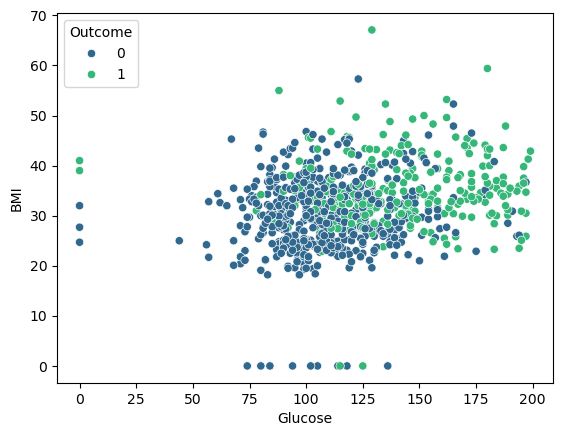

In [55]:
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data, palette='viridis')

## Let's use without the correlation analysis

In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [14]:
x = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age']].values
y = data[['Outcome']].values

In [16]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))


In [17]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 8) (614, 1)
Test set: (154, 8) (154, 1)


In [19]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [20]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 0, 0, 1, 0])

In [21]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8224755700325733
Test set Accuracy:  0.7402597402597403


In [24]:
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       124
           1       0.40      0.70      0.51        30

    accuracy                           0.74       154
   macro avg       0.66      0.72      0.67       154
weighted avg       0.81      0.74      0.76       154



In [100]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.70779221, 0.75974026, 0.75974026, 0.73376623, 0.75974026,
       0.75324675, 0.76623377, 0.79220779, 0.79220779])

### Seems k=7 is working better 

In [26]:
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh
yhat = neigh.predict(x_test)
yhat[0:5]
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       107
           1       0.60      0.66      0.63        47

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154



## Let's do it using correlation analysis first

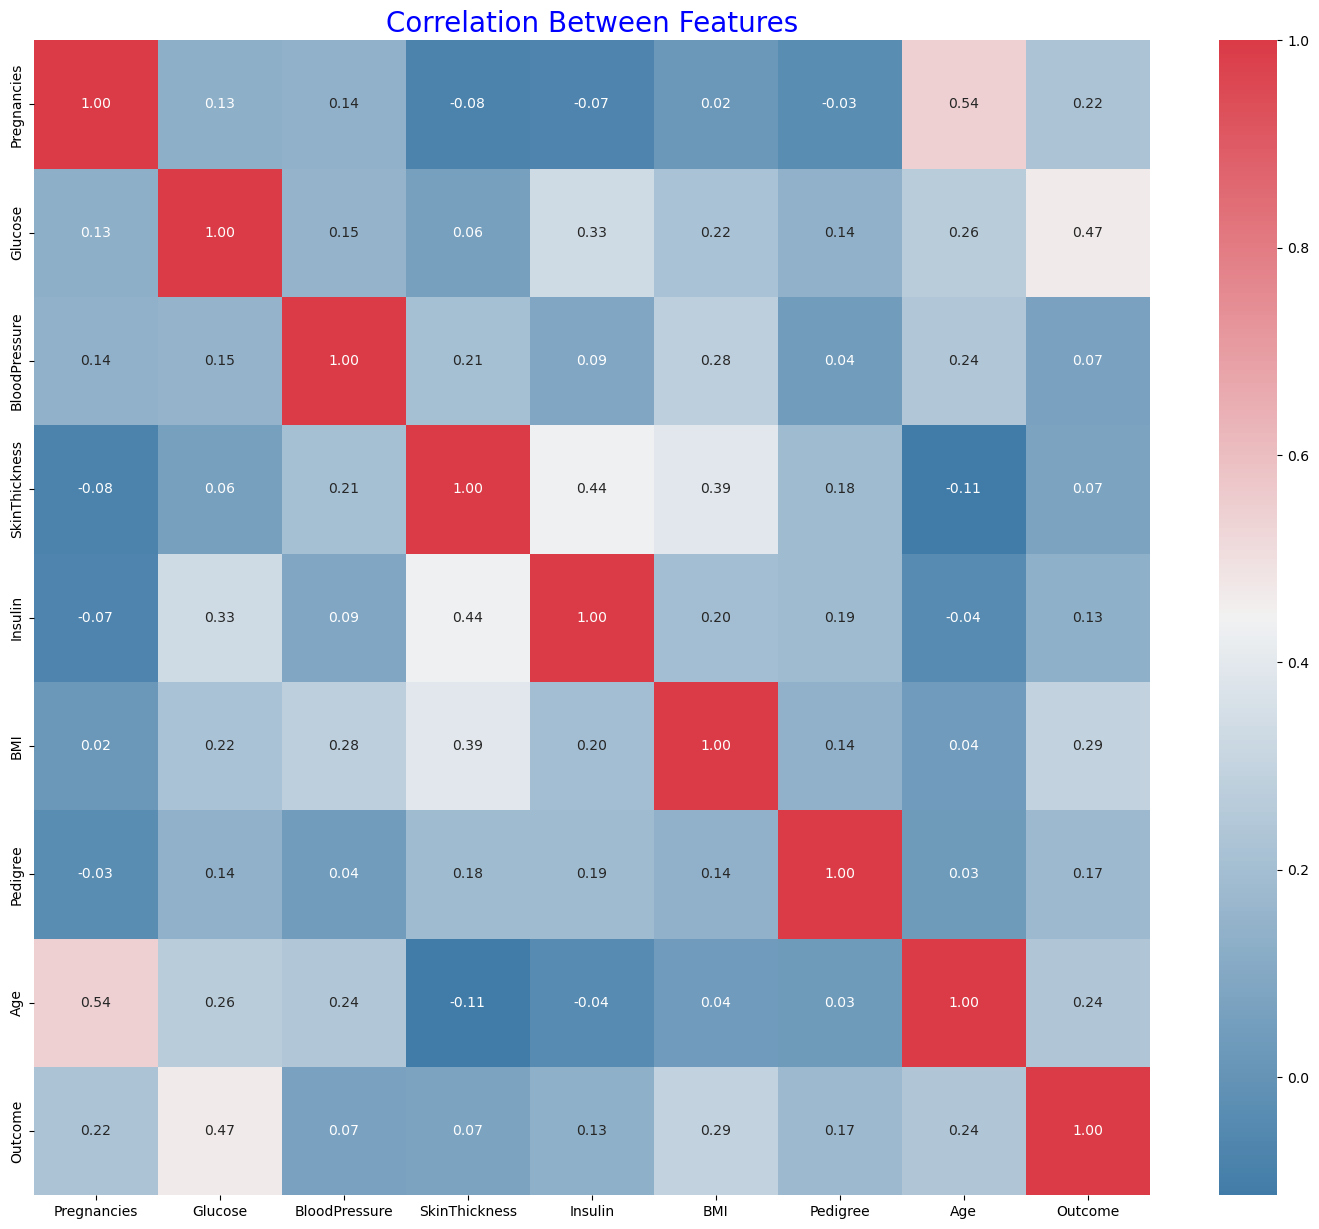

In [27]:
corr = data.corr()
cmap = sns.diverging_palette(240, 10, as_cmap=True)

plt.figure(figsize=(18, 15))

sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap)

plt.title("Correlation Between Features", fontsize=20, color="blue")

plt.show()

In [28]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [71]:
df = data[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']]

In [72]:
x = df[['Pregnancies', 'Glucose', 'Insulin',
       'BMI', 'Pedigree', 'Age']].values
y = df[['Outcome']].values

In [73]:
x.shape

(768, 6)

In [74]:
y.shape

(768, 1)

In [75]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [76]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 6) (614, 1)
Test set: (154, 6) (154, 1)


In [77]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.72077922, 0.73376623, 0.73376623, 0.77272727, 0.75974026,
       0.76623377, 0.75974026, 0.74025974, 0.74675325, 0.75324675,
       0.76623377, 0.77272727, 0.76623377, 0.77272727, 0.79220779,
       0.77922078, 0.78571429, 0.77922078, 0.78571429])

In [78]:
k = 15
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh
yhat = neigh.predict(x_test)
yhat[0:5]
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       110
           1       0.62      0.73      0.67        44

    accuracy                           0.79       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.81      0.79      0.80       154



In [79]:
yhat.shape

(154,)

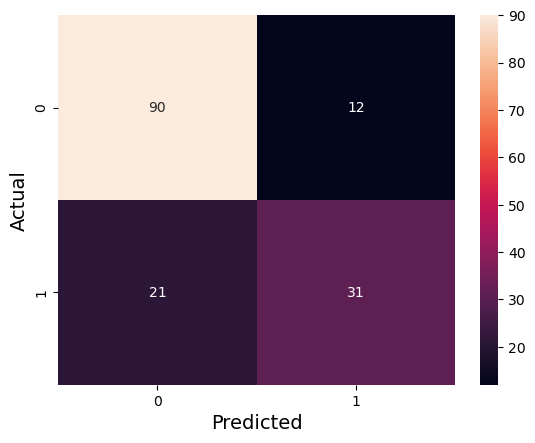

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

k = 15
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh
yhat = neigh.predict(x_test)
yhat[0:5]

#### CM

cm = confusion_matrix(y_test, yhat)

sns.heatmap(cm, annot=True, fmt=".0f")

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

plt.show()

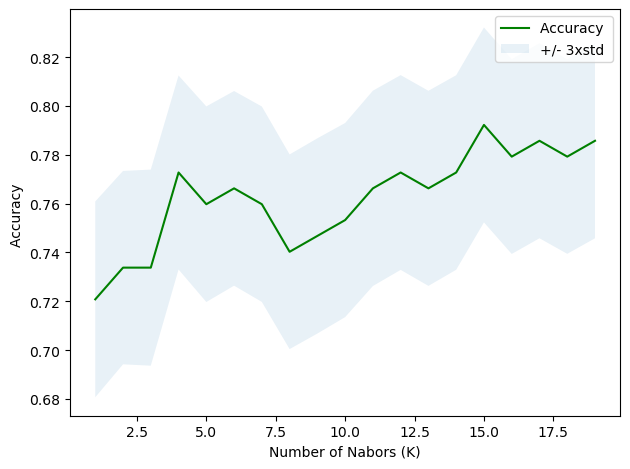

In [59]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### Let's see if we can improve the model with including only the two factors with highest correlation with outcome('Glucose','BMI')

In [80]:
df.columns

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Pedigree', 'Age',
       'Outcome'],
      dtype='object')

In [81]:
df1=df[['Glucose','BMI', 'Outcome']]

In [82]:
x = df1[['Glucose','BMI']].values
y = df1[["Outcome"]].values

In [83]:
print(x.shape)
print(y.shape)

(768, 2)
(768, 1)


In [84]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print(x)

[[ 0.84832379  0.20401277]
 [-1.12339636 -0.68442195]
 [ 1.94372388 -1.10325546]
 ...
 [ 0.00330087 -0.73518964]
 [ 0.1597866  -0.24020459]
 [-0.8730192  -0.20212881]]


In [85]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 2) (614, 1)
Test set: (154, 2) (154, 1)


In [86]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.74025974, 0.72077922, 0.76623377, 0.75324675, 0.77922078,
       0.7987013 , 0.74675325, 0.78571429, 0.77272727, 0.79220779,
       0.77922078, 0.79220779, 0.76623377, 0.77272727, 0.78571429,
       0.77922078, 0.77272727, 0.75974026, 0.77272727])

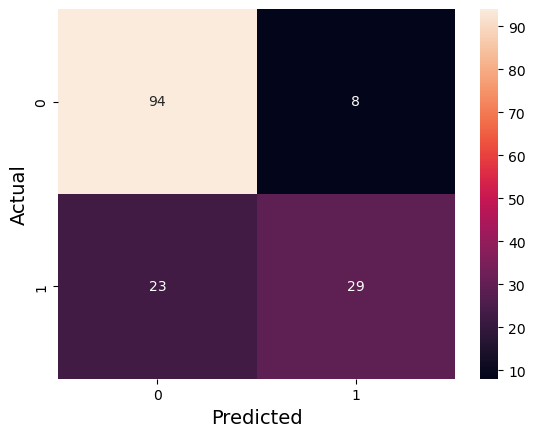

In [89]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh
yhat = neigh.predict(x_test)
yhat[0:5]

cm = confusion_matrix(y_test, yhat)

sns.heatmap(cm, annot=True, fmt=".0f")

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

plt.show()

In [88]:
yhat.shape

(154,)

In [91]:
k = 15
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh
yhat = neigh.predict(x_test)
yhat[0:5]
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       111
           1       0.60      0.72      0.65        43

    accuracy                           0.79       154
   macro avg       0.74      0.77      0.75       154
weighted avg       0.80      0.79      0.79       154



## Then seems we should include other parameters showing correlation not only these two parameters

## Let's try other distance metrics

In [92]:
df = data[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Outcome']]

In [93]:
x = df[['Pregnancies', 'Glucose', 'Insulin',
       'BMI', 'Pedigree', 'Age']].values
y = df[['Outcome']].values

In [94]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

In [96]:
Ks = 20

# Define the list of distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming']

# Initialize arrays to store mean accuracy for each distance metric
mean_acc = np.zeros((len(distance_metrics), Ks-1))

# Iterate over each distance metric
for i, metric in enumerate(distance_metrics):
    for n in range(1, Ks):
        # Train Model and Predict
        neigh = KNeighborsClassifier(n_neighbors=n, metric=metric).fit(x_train, y_train)
        yhat = neigh.predict(x_test)
        mean_acc[i, n-1] = metrics.accuracy_score(y_test, yhat)

# Print the mean accuracy for each distance metric
for i, metric in enumerate(distance_metrics):
    print(f"Mean accuracy for {metric}: {mean_acc[i]}")


Mean accuracy for euclidean: [0.70779221 0.75974026 0.75974026 0.73376623 0.75974026 0.75324675
 0.76623377 0.79220779 0.79220779 0.78571429 0.79220779 0.81168831
 0.7987013  0.79220779 0.7987013  0.77922078 0.78571429 0.76623377
 0.77922078]
Mean accuracy for manhattan: [0.73376623 0.77272727 0.75324675 0.74675325 0.74025974 0.77922078
 0.76623377 0.78571429 0.78571429 0.77272727 0.77272727 0.77272727
 0.7987013  0.7987013  0.7987013  0.80519481 0.80519481 0.81818182
 0.81818182]
Mean accuracy for chebyshev: [0.72077922 0.74675325 0.75324675 0.75974026 0.77922078 0.74675325
 0.76623377 0.77272727 0.75974026 0.77922078 0.76623377 0.78571429
 0.78571429 0.80519481 0.78571429 0.7987013  0.78571429 0.7987013
 0.76623377]
Mean accuracy for minkowski: [0.70779221 0.75974026 0.75974026 0.73376623 0.75974026 0.75324675
 0.76623377 0.79220779 0.79220779 0.78571429 0.79220779 0.81168831
 0.7987013  0.79220779 0.7987013  0.77922078 0.78571429 0.76623377
 0.77922078]
Mean accuracy for hamming: [0

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       110
           1       0.65      0.77      0.71        44

    accuracy                           0.82       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.83      0.82      0.82       154



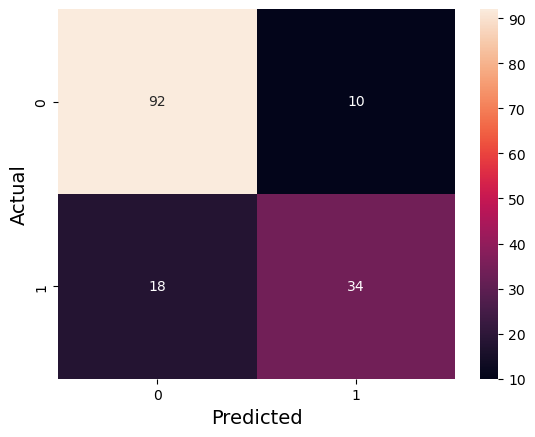

In [101]:
k = 19
neigh = KNeighborsClassifier(n_neighbors = k,metric="manhattan").fit(x_train,y_train)
neigh
yhat = neigh.predict(x_test)
yhat[0:5]
print(classification_report(yhat,y_test))
cm = confusion_matrix(y_test, yhat)

sns.heatmap(cm, annot=True, fmt=".0f")

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

plt.show()